In [1]:
import matplotlib.pyplot as plt
import glob

In [2]:
%matplotlib inline

In [3]:
cache_glob = glob.glob(
    "/home/xyhang/projects/VCIP2023-grand-challenge/cache/PSNR/*/*/*/b_e.npz"
)
import random
random.shuffle(cache_glob)
cache_glob = cache_glob[:1000]

print(len(cache_glob))

1000


In [4]:
import site
site.addsitedir("/home/xyhang/projects/VCIP2023-grand-challenge/")

from src.math_utils import FitKExp

In [5]:
import tqdm
import numpy as np

R2_results = [[], [], [], [], []]
maxerror_results = [[], [], [], [], []]

for filename in tqdm.tqdm(cache_glob):
    curve = FitKExp.load(filename)
    X = curve.X
    Y = curve.Y
    fitters = list([FitKExp(X=X, Y=Y, K=i, retry=False) for i in range(1, 6)])
    for i, fitter in enumerate(fitters):
        R2_results[i].append(fitter.R2(fitter.curve))
        maxerror_results[i].append(fitter.maxerror(fitter.curve))

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 2/1000 [00:01<10:40,  1.56it/s]/home/xyhang/anaconda3/envs/SARDCO/lib/python3.9/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
100%|██████████| 1000/1000 [15:14<00:00,  1.09it/s]


In [6]:
R2_results = np.asarray(R2_results)
maxerror_results = np.asarray(maxerror_results)

In [7]:
maxerror_results[4]

array([4.26762040e-01, 6.41698582e-01, 6.86362666e+00, 1.08483231e+01,
       7.84512900e-01, 4.96852318e+00, 4.15536615e+01, 1.16431734e+02,
       2.52111546e+01, 9.38971321e-01, 1.63400996e+00, 4.06273251e-01,
       2.68310619e+00, 1.54180145e+02, 4.94358338e-01, 4.06928666e+00,
       4.90080255e+00, 3.72638891e+00, 1.61598583e+00, 1.78838245e+00,
       2.71673595e+00, 1.61423227e+00, 1.39838204e+00, 8.36694831e-01,
       1.43586033e+00, 2.25623993e+00, 4.95101797e+00, 7.78118774e+00,
       2.12835993e+00, 4.31264054e+00, 1.71634130e+00, 4.86299837e+01,
       2.50668678e+01, 4.59495241e+00, 4.32565436e+00, 3.01279783e+00,
       5.87390352e+00, 7.57208409e+00, 3.02709088e+00, 4.83664773e+00,
       4.76795220e+00, 5.74262355e+00, 3.59458064e+00, 5.44852588e+00,
       6.04278522e+00, 1.33396241e+01, 1.82195836e+00, 1.69516610e+00,
       1.02613564e+00, 2.82548701e-01, 5.76558947e+00, 4.01149858e+00,
       7.40484712e-01, 1.05341256e+01, 6.11267121e+00, 6.24652943e-01,
      

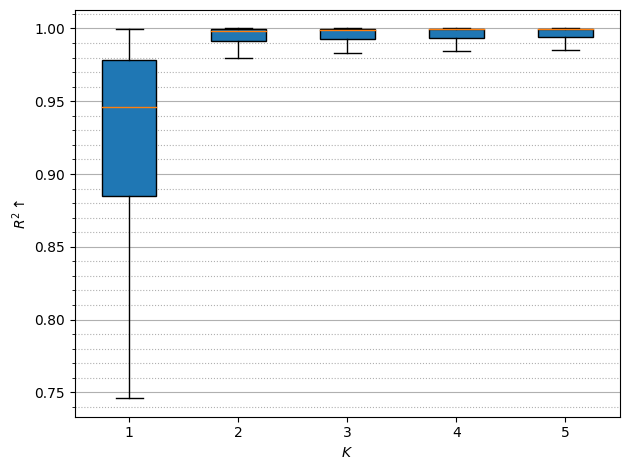

In [8]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("$K$")

ax1.set_ylabel(r"$R^2\uparrow$")
ax1.tick_params(axis="x", which="minor", bottom=False)

ax1.minorticks_on()

ax1.boxplot(list(R2_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

fig.tight_layout()

plt.xticks([1,2,3,4,5])

plt.grid(which='major', axis='y', linestyle='-')
plt.grid(which='minor', axis='y', linestyle=':')

plt.savefig('./K_Exp_R2.png', dpi=300)
plt.savefig('./K_Exp_R2.pdf')

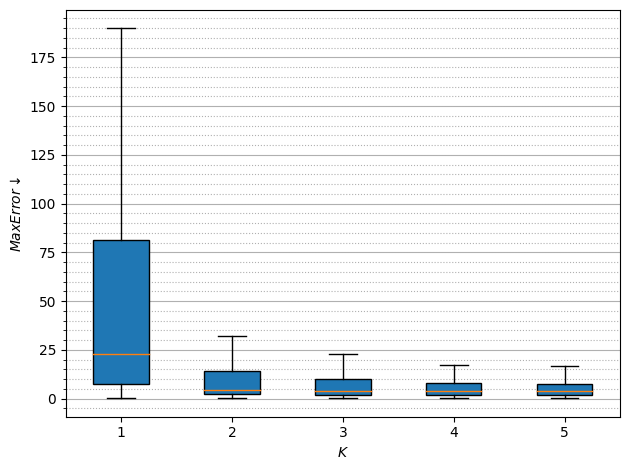

In [10]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("$K$")

ax1.set_ylabel(r"$Max Error\downarrow$")
ax1.tick_params(axis="x", which="minor", bottom=False)

ax1.minorticks_on()

ax1.boxplot(list(maxerror_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

fig.tight_layout()

plt.xticks([1, 2, 3, 4, 5])

plt.grid(which="major", axis="y", linestyle="-")
plt.grid(which="minor", axis="y", linestyle=":")

plt.savefig("./K_Exp.png", dpi=300)
plt.savefig("./K_Exp.pdf")